---

<div align="center">
    
## Image Processing  
#### (ENIN 880CA – fall 2021) 
### Assignment 1 
### Instructor: Mehran Mehrandezh 
#### Elyar Zavvari
    
</div>

---



Students should read chapters 12 and 13 of the book: Robotics, Vision, and Control by Peter Corke (1 st Edition).  
Students should also watch the following videos on MasterClasses under “computer vision” in QUT Robot Academy: Image Processing (10 lessons), Spatial Operators (11 lessons), and Feature Extraction (9 lessons).  
Students are allowed to use the following toolboxes/software libraries for doing exercise #1:

* __Machine Vision Toolbox__ in Matlab by Peter Corke
* __Image Processing Toolbox__ in Matlab by Mathworks
* __Computer Vision Toolbox__ in Matlab by Mathworks
* __OpenCV__
---

1- __Basics:__ Write a program that grabs a frame from your own camera and displays it. Add the following effects to the image: (1) negative image, (2) thresholding, (3) edge
filtering.

<span style="color:DarkCyan">
    
The codes are executed in opencv toolbox. Since there is no camera attached to this system we have imported a downloaded picture to our path named **image01.jpg**.  
    Image negative is produced by subtracting each pixel from the maximum intensity value. For example for an 8-bit image, the max intensity value is $ 2^8– 1 = 255 $, thus each pixel is subtracted from $255$ to produce the output image.  
    Thus, the transformation function used in image negative is  
    
\begin{equation}
    s=L-1-r
\end{equation}

Where $L-1$ is the max intensity value and $s$, and $r$ are the output and input pixel values respectively.

</span>

uint8


Text(0.5, 1.0, 'Negative Picture')

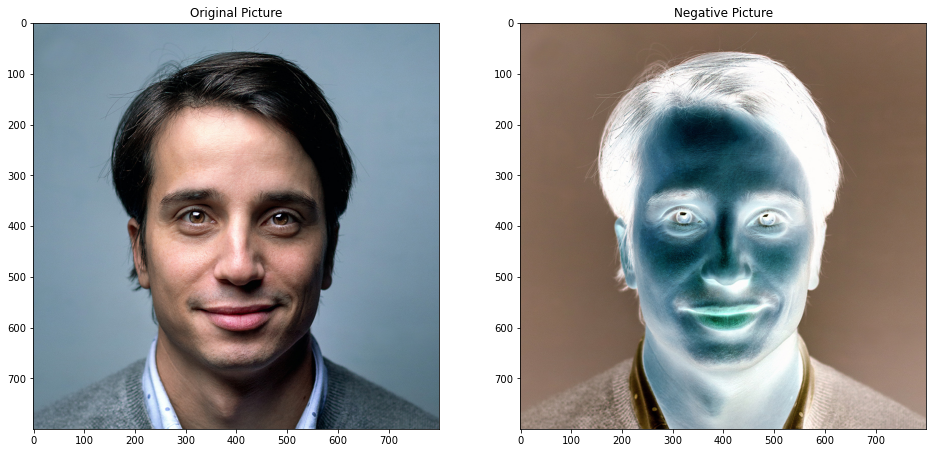

In [23]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("img.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Check the datatype of the image
print(image.dtype)

# Subtract the img from max value(calculated from dtype)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_neg = 255 - img

# Show the image 
f = plt.figure(figsize = (16,16))

f.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Picture")

f.add_subplot(1,2,2)
plt.imshow(img_neg, cmap="gray", vmin=0, vmax=255)
plt.title("Negative Picture")

<span style="color:DarkCyan">
    
In the following code we are going to convert the previous picture to a grayscale one:

</span>

Text(0.5, 1.0, 'Grayscale Picture')

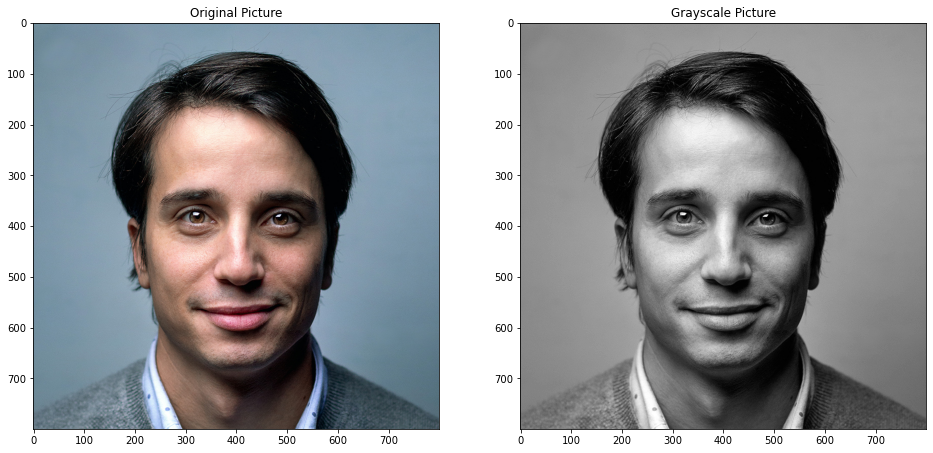

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("img.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the image 
f = plt.figure(figsize = (16,16))

f.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Picture")

f.add_subplot(1,2,2)
plt.imshow(img_gray, cmap="gray", vmin=0, vmax=255)
plt.title("Grayscale Picture")

<span style="color:DarkCyan">
    
In thresholding, each pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255). There are several ways of thresholding and we applied binary thresholding to the image. Binary thresholding can be obtained by the following formula:  
    
\begin{equation}
dst(x,y) =
  \begin{cases}
    maxval       & if srx(x,y)>tresh\\
    0  & otherwise
  \end{cases}
\end{equation}

    
</span>

Text(0.5, 1.0, 'Threshold Picture')

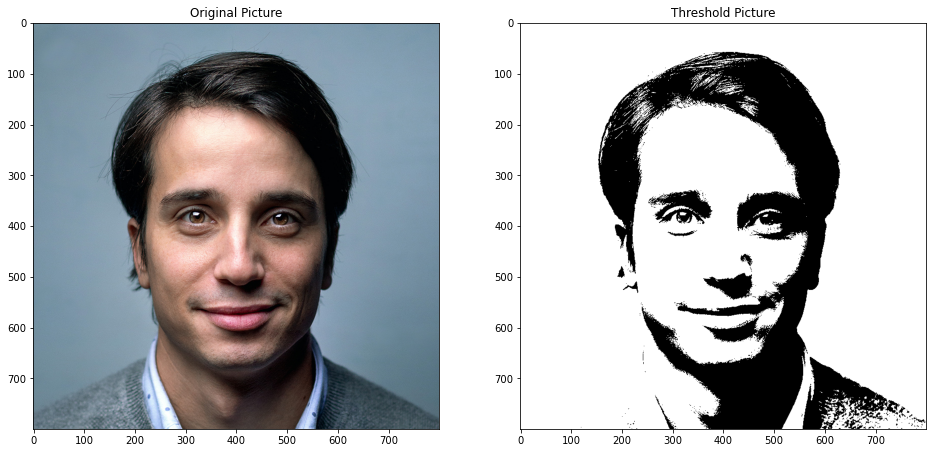

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("img.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# applying the binary thresholding technique on the input image
# all pixels value above 120 will be set to 255
ret, img_thresh = cv2.threshold(img_gray, 75, 256, cv2.THRESH_BINARY)

# Show the image 
f = plt.figure(figsize = (16,16))

f.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Picture")

f.add_subplot(1,2,2)
plt.imshow(img_thresh,  cmap="gray", vmin=0, vmax=255)
plt.title("Threshold Picture")

Text(0.5, 1.0, 'Edges of Picture')

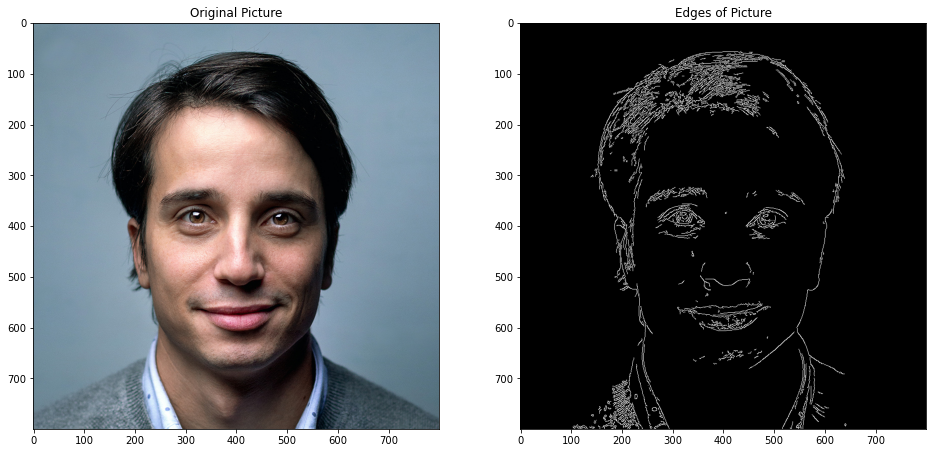

In [17]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("img.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# applying the edge detection technique on the input image
img_edges = cv2.Canny(img,130,256)

# Show the image 
f = plt.figure(figsize = (16,16))

f.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Picture")

f.add_subplot(1,2,2)
plt.imshow(img_edges,  cmap="gray", vmin=0, vmax=255)
plt.title("Edges of Picture")

---
---

2- __Convolution:__ Grab a frame of your own photo, and apply smoothing by: (1) using a 21 x 21 uniform kernel and a Gaussian kernel. Can you observe the ringing artefact in the former?

Text(0.5, 1.0, 'Blurred Picture with uniform kernel')

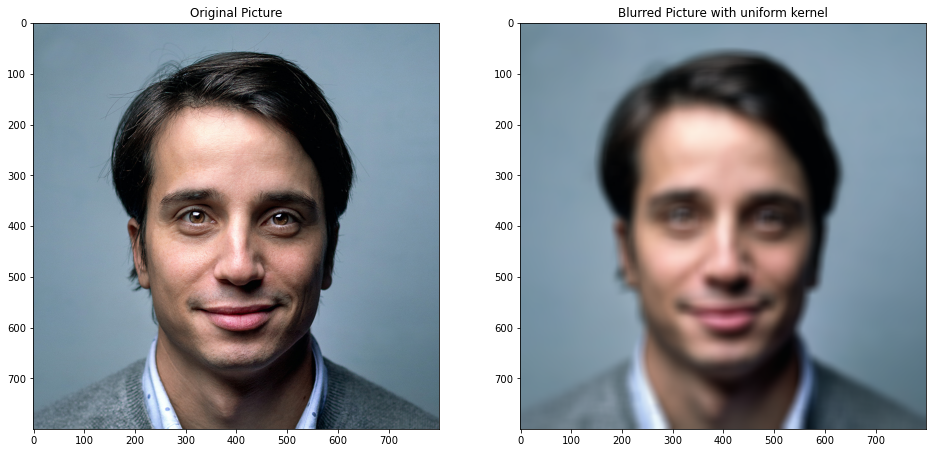

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("img.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#creating kernel matrix
kernel = np.ones((21, 21), np.float32) / (21**2)

#Convoluting the image withh kernel
img_uniform = cv2.filter2D(image, -1, kernel)

# Show the image 
f = plt.figure(figsize = (16,16))

f.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Picture")

f.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_uniform, cv2.COLOR_BGR2RGB))
plt.title("Blurred Picture with uniform kernel")

Text(0.5, 1.0, 'Gaussian Blurred Picture')

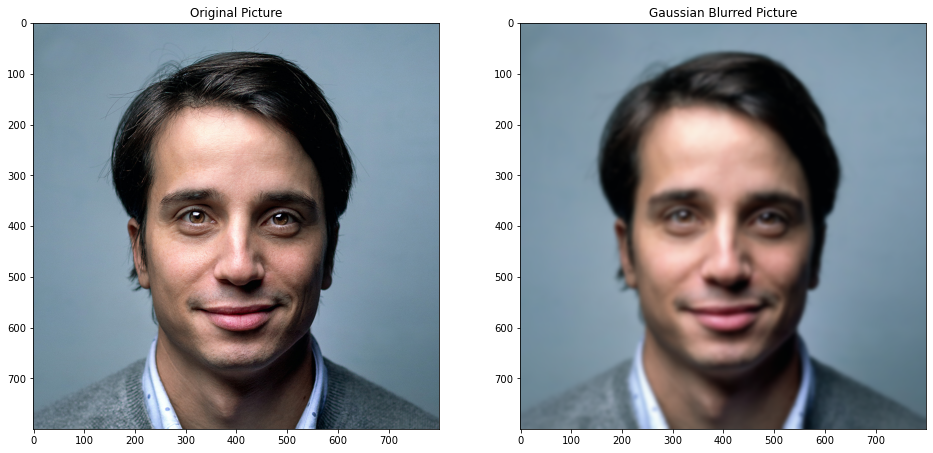

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("img.jpg")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#applying Gaussian blur on image
img_gaussian = g = cv2.GaussianBlur(image, (21,21), 0)

# Show the image 
f = plt.figure(figsize = (16,16))

f.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Picture")

f.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_gaussian, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blurred Picture")